In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('D:/Data Sets/Sentiment Analysis/Twitter and Reddit sentiment analysis/Twitter_Data.csv')

In [3]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
data['clean_text'][1]

'talk all the nonsense and continue all the drama will vote for modi '

In [6]:
data.shape

(162980, 2)

In [ ]:
#here we see that the data is cleaned in terms of redundant letters and caps. 
#also the sentiments have been encoded, so we can skip all these steps and can carry on with the model building

In [10]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [12]:
data=data.dropna()
data=data.reset_index(drop=True)
print(data.shape)

(162969, 2)


AxesSubplot(0.125,0.125;0.775x0.755)


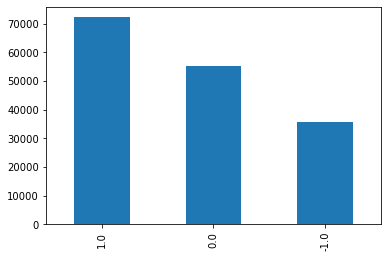

In [34]:
print(data['category'].value_counts().plot(kind='bar'))

In [17]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer as cv, TfidfVectorizer as tfidf

In [18]:
from sklearn.metrics import accuracy_score, classification_report

### Bag of Words 

In [19]:
cv=cv(max_features=5000) #for bag of words
x=cv.fit_transform(data['clean_text']).toarray()
y=data['category'].values

In [20]:
x.shape

(162969, 5000)

In [21]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y

array([-1.,  0.,  1., ...,  0.,  0.,  1.])

In [23]:
y.shape

(162969,)

In [24]:
from sklearn.model_selection import train_test_split
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB as nb
classifier_nb=nb()
classifier_nb.fit(x_train_bow,y_train_bow)

MultinomialNB()

In [32]:
#predicting values
y_pred_bow=classifier_nb.predict(x_test_bow)
print("Accuracy is:",accuracy_score(y_test_bow,y_pred_bow)*100)
print(classification_report(y_test_bow,y_pred_bow))

Accuracy is: 81.1008161011229
              precision    recall  f1-score   support

        -1.0       0.71      0.75      0.73      7136
         0.0       0.89      0.79      0.84     11026
         1.0       0.81      0.86      0.83     14432

    accuracy                           0.81     32594
   macro avg       0.80      0.80      0.80     32594
weighted avg       0.82      0.81      0.81     32594



## TF-IDF

In [43]:
tf=tfidf(max_features=100)
x_tf=tf.fit_transform(data['clean_text']).toarray()
y_tf=y

In [44]:
#splitting the data again
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(x_tf,y,test_size=0.2)
classifier_tf=nb()
classifier_tf.fit(x_train_tf,y_train_tf)

MultinomialNB()

In [45]:
#predicting the values
y_pred_tf=classifier_tf.predict(x_test_tf)
print('Accuracy is:',accuracy_score(y_test_tf,y_pred_tf))
print(classification_report(y_test_tf,y_pred_tf))

Accuracy is: 0.47502607841934097
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      7170
         0.0       0.53      0.25      0.34     11039
         1.0       0.46      0.89      0.61     14385

    accuracy                           0.48     32594
   macro avg       0.33      0.38      0.32     32594
weighted avg       0.38      0.48      0.38     32594



C:\Users\91884\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Note here in TFIDF, the accuracy fell drastically because the system is not alloting any more space
#so I had to go with 100 features in tfdf in contrast to 5000 features in Bag of words
#you can surely try it out with different values of features